In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df_bbrc = pd.read_csv("./BBRC11 Dados Históricos.csv")
df_bbrc.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,06.07.2012,"109,03","110,46","110,48","103,99","2,54K","-1,31%"
1,10.07.2012,"111,35","107,58","111,35","107,58","1,99K","2,13%"
2,11.07.2012,"109,52","111,35","111,35","109,52","0,20K","-1,64%"
3,12.07.2012,"111,26","109,53","111,26","108,56","0,14K","1,59%"
4,13.07.2012,"106,62","108,56","110,00","106,61","2,34K","-4,17%"


In [3]:
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      3048 non-null   object
 1   Último    3048 non-null   object
 2   Abertura  3048 non-null   object
 3   Máxima    3048 non-null   object
 4   Mínima    3048 non-null   object
 5   Vol.      3043 non-null   object
 6   Var%      3048 non-null   object
dtypes: object(7)
memory usage: 166.8+ KB


In [4]:
df_bbrc.columns = ["Data", "Ultimo", "Abertura", "Max", "Min", "Vol", "Var"]

In [5]:
df_bbrc.columns

Index(['Data', 'Ultimo', 'Abertura', 'Max', 'Min', 'Vol', 'Var'], dtype='object')

In [6]:
df_bbrc["Data"] = pd.to_datetime(df_bbrc["Data"], format="%d.%m.%Y")
df_bbrc.set_index("Data", inplace=True)
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3048 entries, 2012-07-06 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ultimo    3048 non-null   object
 1   Abertura  3048 non-null   object
 2   Max       3048 non-null   object
 3   Min       3048 non-null   object
 4   Vol       3043 non-null   object
 5   Var       3048 non-null   object
dtypes: object(6)
memory usage: 166.7+ KB


In [7]:
df_bbrc.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2012-07-06,"109,03","110,46","110,48","103,99","2,54K","-1,31%"
2012-07-10,"111,35","107,58","111,35","107,58","1,99K","2,13%"
2012-07-11,"109,52","111,35","111,35","109,52","0,20K","-1,64%"
2012-07-12,"111,26","109,53","111,26","108,56","0,14K","1,59%"
2012-07-13,"106,62","108,56","110,00","106,61","2,34K","-4,17%"


In [8]:
for coluna in ["Ultimo", "Abertura", "Max", "Min"]:
    df_bbrc[coluna] = df_bbrc[coluna].str.replace(".", "").str.replace(",", ".").astype(float)

df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3048 entries, 2012-07-06 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    3048 non-null   float64
 1   Abertura  3048 non-null   float64
 2   Max       3048 non-null   float64
 3   Min       3048 non-null   float64
 4   Vol       3043 non-null   object 
 5   Var       3048 non-null   object 
dtypes: float64(4), object(2)
memory usage: 166.7+ KB


In [9]:
df_bbrc.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2012-07-06,109.03,110.46,110.48,103.99,"2,54K","-1,31%"
2012-07-10,111.35,107.58,111.35,107.58,"1,99K","2,13%"
2012-07-11,109.52,111.35,111.35,109.52,"0,20K","-1,64%"
2012-07-12,111.26,109.53,111.26,108.56,"0,14K","1,59%"
2012-07-13,106.62,108.56,110.00,106.61,"2,34K","-4,17%"


In [10]:
df_bbrc["Vol"] = df_bbrc["Vol"].apply(lambda x: pd.eval(x.replace(",", ".").replace("K", "*1e3").replace("M", "*1e6")) if pd.notnull(x) else None)
df_bbrc["Vol"] = df_bbrc["Vol"].fillna(df_bbrc["Vol"].rolling(window=5, min_periods=1).mean())
df_bbrc.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2012-07-06,109.03,110.46,110.48,103.99,2540.0,"-1,31%"
2012-07-10,111.35,107.58,111.35,107.58,1990.0,"2,13%"
2012-07-11,109.52,111.35,111.35,109.52,200.0,"-1,64%"
2012-07-12,111.26,109.53,111.26,108.56,140.0,"1,59%"
2012-07-13,106.62,108.56,110.00,106.61,2340.0,"-4,17%"


In [11]:
df_bbrc["Var"] = df_bbrc["Var"].str.replace("%", "").str.replace(".", "").str.replace(",", ".").astype(float) / 100
df_bbrc.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2012-07-06,109.03,110.46,110.48,103.99,2540.0,-0.0131
2012-07-10,111.35,107.58,111.35,107.58,1990.0,0.0213
2012-07-11,109.52,111.35,111.35,109.52,200.0,-0.0164
2012-07-12,111.26,109.53,111.26,108.56,140.0,0.0159
2012-07-13,106.62,108.56,110.00,106.61,2340.0,-0.0417


In [12]:
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3048 entries, 2012-07-06 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    3048 non-null   float64
 1   Abertura  3048 non-null   float64
 2   Max       3048 non-null   float64
 3   Min       3048 non-null   float64
 4   Vol       3048 non-null   float64
 5   Var       3048 non-null   float64
dtypes: float64(6)
memory usage: 166.7 KB


In [13]:
df_bbrc.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000
mean,104.711867,104.726316,105.501781,103.854275,1230.571686,-0.000132
std,20.045859,20.037213,20.117311,19.899753,1271.593791,0.023617
min,60.700000,61.580000,62.240000,60.700000,0.000000,-0.991600
25%,88.227500,88.190000,88.902500,87.305000,510.000000,-0.004700
50%,103.805000,103.970000,104.770000,103.000000,900.000000,0.000000
75%,120.100000,120.042500,121.200000,118.842500,1520.000000,0.004725
max,161.800000,161.800000,162.990000,159.100000,23110.000000,0.184100


In [14]:
def limpar_dados(data_frame):
    data_frame.columns = ["Data", "Ultimo", "Abertura", "Max", "Min", "Vol", "Var"]
    data_frame["Data"] = pd.to_datetime(data_frame["Data"], format="%d.%m.%Y")
    data_frame.set_index("Data", inplace=True)
    for coluna in ["Ultimo", "Abertura", "Max", "Min"]:
        data_frame[coluna] = data_frame[coluna].str.replace(".", "").str.replace(",", ".").astype(float)
    data_frame["Vol"] = data_frame["Vol"].apply(lambda x: pd.eval(x.replace(",", ".").replace("K", "*1e3").replace("M", "*1e6")) if pd.notnull(x) else None)
    data_frame["Vol"] = data_frame["Vol"].fillna(data_frame["Vol"].rolling(window=5, min_periods=1).mean())
    data_frame["Var"] = data_frame["Var"].str.replace("%", "").str.replace(".", "").str.replace(",", ".").astype(float) / 100
    return data_frame

In [15]:
df_bova = pd.read_csv("./BOVA11 - Histórico.csv")
df_bova.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,03.12.2008,"35,31","34,73","35,40","33,90","330,16K","-0,23%"
1,04.12.2008,"35,70","35,80","36,00","35,15","128,40K","1,10%"
2,05.12.2008,"35,35","34,51","35,35","34,11","193,70K","-0,98%"
3,08.12.2008,"38,46","37,35","38,46","36,95","103,10K","8,80%"
4,09.12.2008,"37,54","38,58","38,82","37,54","274,50K","-2,39%"


In [16]:
df_bova = limpar_dados(df_bova)
df_bova.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3943 entries, 2008-12-03 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    3943 non-null   float64
 1   Abertura  3943 non-null   float64
 2   Max       3943 non-null   float64
 3   Min       3943 non-null   float64
 4   Vol       3943 non-null   float64
 5   Var       3943 non-null   float64
dtypes: float64(6)
memory usage: 215.6 KB


In [17]:
df_bova.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,3943.000000,3943.000000,3943.000000,3943.000000,3.943000e+03,3943.000000
mean,76.459655,76.490761,77.112922,75.782714,3.859171e+06,0.000445
std,26.046029,26.053721,26.167494,25.934144,3.809217e+06,0.015556
min,35.310000,34.510000,35.350000,33.900000,4.400000e+03,-0.145700
25%,54.570000,54.620000,55.140000,54.025000,1.220000e+06,-0.007900
50%,66.910000,66.940000,67.400000,66.300000,2.740000e+06,0.000500
75%,100.840000,100.930000,101.775000,100.110000,5.450000e+06,0.008900
max,133.620000,133.290000,133.780000,132.930000,4.590000e+07,0.134000


In [18]:
df_hgcr = pd.read_csv("./HGCR11 Dados Históricos.csv")
df_hgcr.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,06.07.2012,"912,18","912,18","912,18","912,18","0,03K","0,00%"
1,10.07.2012,"921,13","921,13","921,13","921,13","0,01K","0,98%"
2,11.07.2012,"907,71","907,71","907,71","907,71","0,05K","-1,46%"
3,12.07.2012,"905,03","907,71","907,71","905,03","0,01K","-0,30%"
4,13.07.2012,"911,29","907,71","915,76","907,71","0,07K","0,69%"


In [19]:
df_hgcr = limpar_dados(df_hgcr)
df_hgcr.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2012-07-06,912.18,912.18,912.18,912.18,30.0,0.0000
2012-07-10,921.13,921.13,921.13,921.13,10.0,0.0098
2012-07-11,907.71,907.71,907.71,907.71,50.0,-0.0146
2012-07-12,905.03,907.71,907.71,905.03,10.0,-0.0030
2012-07-13,911.29,907.71,915.76,907.71,70.0,0.0069


In [20]:
df_hgcr.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000,2978.000000
mean,393.776588,393.842307,396.057304,391.172858,15115.957018,-0.000081
std,402.177087,402.290756,404.411844,399.637496,18551.092104,0.022738
min,75.560000,75.480000,76.030000,70.000000,0.000000,-0.922800
25%,87.620000,87.640000,87.875000,86.962500,80.000000,-0.003700
50%,100.560000,100.505000,101.250000,99.900000,8270.000000,0.000000
75%,898.877500,898.940000,901.605000,889.980000,26370.000000,0.005000
max,1117.870000,1134.750000,1169.740000,1116.080000,174140.000000,0.180000


In [21]:
df_hglg = pd.read_csv("./HGLG11 Dados Históricos.csv")
df_hglg.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,06.07.2012,"1.181,93","1.181,92","1.181,93","1.181,92","0,02K","1,90%"
1,10.07.2012,"1.179,29","1.181,93","1.181,93","1.179,29","0,02K","-0,22%"
2,11.07.2012,"1.181,93","1.181,93","1.181,93","1.181,93","0,00K","0,22%"
3,12.07.2012,"1.181,93","1.181,93","1.181,93","1.181,93","0,00K","0,00%"
4,13.07.2012,"1.181,93","1.181,93","1.181,93","1.181,93","0,01K","0,00%"


In [22]:
df_hglg = limpar_dados(df_hglg)
df_hglg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3037 entries, 2012-07-06 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    3037 non-null   float64
 1   Abertura  3037 non-null   float64
 2   Max       3037 non-null   float64
 3   Min       3037 non-null   float64
 4   Vol       3037 non-null   float64
 5   Var       3037 non-null   float64
dtypes: float64(6)
memory usage: 166.1 KB


In [23]:
df_hglg.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000,3037.000000
mean,471.251103,471.606671,474.670609,467.209816,22134.411426,-0.000047
std,429.875275,430.197902,433.030421,425.952203,28849.656225,0.021726
min,93.830000,96.090000,98.260000,92.750000,0.000000,-0.916700
25%,141.050000,141.070000,141.700000,140.200000,410.000000,-0.003700
50%,157.000000,157.060000,157.710000,156.130000,17760.000000,0.000000
75%,964.020000,965.490000,974.510000,954.780000,35480.000000,0.004600
max,1390.000000,1389.990000,1399.990000,1365.000000,458120.000000,0.139900


In [94]:
df_jsre = pd.read_csv("./JSRE11 Dados Históricos.csv")
df_jsre.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.07.2012,"130,00","130,00","130,00","130,00","0,02K","0,77%"
1,13.07.2012,"135,00","133,00","135,00","133,00","0,04K","3,85%"
2,16.07.2012,"133,00","133,00","133,00","133,00","0,01K","-1,48%"
3,17.07.2012,"133,00","133,00","133,00","133,00","0,00K","0,00%"
4,19.07.2012,"133,15","134,90","134,90","133,15","0,20K","0,11%"


In [96]:
df_jsre = limpar_dados(df_jsre)
df_jsre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2987 entries, 2012-07-11 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2987 non-null   float64
 1   Abertura  2987 non-null   float64
 2   Max       2987 non-null   float64
 3   Min       2987 non-null   float64
 4   Vol       2987 non-null   float64
 5   Var       2987 non-null   float64
dtypes: float64(6)
memory usage: 163.4 KB


In [98]:
df_jsre.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000
mean,83.491215,83.516083,84.180439,82.757650,20130.998493,-0.000381
std,14.216230,14.208590,14.295131,14.126063,21174.874456,0.021725
min,53.790000,53.880000,54.180000,53.110000,0.000000,-0.917300
25%,72.730000,72.730000,73.330000,72.200000,5065.000000,-0.005600
50%,84.480000,84.440000,84.970000,83.770000,15150.000000,0.000000
75%,90.235000,90.185000,90.955000,89.990000,28825.000000,0.005500
max,135.000000,134.900000,135.000000,133.150000,364650.000000,0.124100


In [27]:
df_kncr = pd.read_csv("./KNCR11 Dados Históricos.csv")
df_kncr.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,25.10.2024,"104,07","103,80","104,56","103,58","117,42K","0,29%"
1,24.10.2024,"103,77","104,00","104,15","103,69","89,27K","-0,40%"
2,23.10.2024,"104,19","103,71","104,40","103,50","157,94K","0,45%"
3,22.10.2024,"103,72","103,93","103,93","103,27","124,83K","-0,20%"
4,21.10.2024,"103,93","104,11","104,18","103,75","111,86K","-0,12%"


In [28]:
df_kncr = limpar_dados(df_kncr)
df_kncr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2968 entries, 2024-10-25 to 2012-11-12
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2968 non-null   float64
 1   Abertura  2968 non-null   float64
 2   Max       2968 non-null   float64
 3   Min       2968 non-null   float64
 4   Vol       2968 non-null   float64
 5   Var       2968 non-null   float64
dtypes: float64(6)
memory usage: 162.3 KB


In [29]:
df_kncr.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2968.000000,2968.000000,2968.000000,2968.000000,2.968000e+03,2968.000000
mean,93.368892,93.348878,93.853066,92.737887,4.974858e+04,0.000115
std,10.496297,10.503869,10.526412,10.462679,5.490457e+04,0.012247
min,72.310000,71.520000,73.240000,57.410000,1.000000e+02,-0.176300
25%,83.017500,83.000000,83.652500,82.572500,1.246250e+04,-0.003000
50%,94.575000,94.470000,95.020000,93.795000,3.363500e+04,0.000100
75%,102.250000,102.252500,102.670000,101.740000,7.435250e+04,0.003800
max,117.000000,116.980000,117.400000,115.580000,1.160000e+06,0.193400


In [127]:
df_knri = pd.read_csv("./KNRI11 Dados Históricos.csv")
df_knri.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,06.07.2012,"169,46","169,45","169,46","167,96","1,18K","0,30%"
1,10.07.2012,"169,46","170,95","171,45","169,46","0,99K","0,00%"
2,11.07.2012,"171,45","170,45","171,45","168,66","1,12K","1,18%"
3,12.07.2012,"171,45","170,45","172,94","170,45","0,63K","0,00%"
4,13.07.2012,"170,45","170,95","172,93","169,97","0,94K","-0,58%"


In [129]:
df_knri = limpar_dados(df_knri)
df_knri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3055 entries, 2012-07-06 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    3055 non-null   float64
 1   Abertura  3055 non-null   float64
 2   Max       3055 non-null   float64
 3   Min       3055 non-null   float64
 4   Vol       3055 non-null   float64
 5   Var       3055 non-null   float64
dtypes: float64(6)
memory usage: 167.1 KB


In [130]:
df_knri.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,137.384867,137.441771,138.472884,136.223286,20550.660393,-0.000248
std,21.062264,21.113931,21.185894,20.872004,22853.795112,0.020950
min,88.600000,88.880000,89.740000,88.260000,310.000000,-0.900300
25%,122.030000,121.845000,123.045000,121.055000,9310.000000,-0.004900
50%,137.690000,137.720000,138.750000,136.640000,17970.000000,0.000000
75%,152.000000,152.080000,152.910000,151.005000,26525.000000,0.005200
max,199.600000,199.500000,200.000000,199.010000,639040.000000,0.108600


In [33]:
df_mxrf = pd.read_csv("./MXRF11 Dados Históricos.csv")
df_mxrf.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,21.05.2012,"3,92","3,90","3,93","3,87","38,53K","1,03%"
1,22.05.2012,"3,90","3,91","3,91","3,86","3,56K","-0,51%"
2,23.05.2012,"3,84","3,86","3,86","3,82","12,19K","-1,54%"
3,24.05.2012,"3,86","3,86","3,86","3,82","5,40K","0,52%"
4,25.05.2012,"3,85","3,86","3,90","3,85","71,48K","-0,26%"


In [34]:
df_mxrf = limpar_dados(df_mxrf)
df_mxrf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3089 entries, 2012-05-21 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    3089 non-null   float64
 1   Abertura  3089 non-null   float64
 2   Max       3089 non-null   float64
 3   Min       3089 non-null   float64
 4   Vol       3089 non-null   float64
 5   Var       3089 non-null   float64
dtypes: float64(6)
memory usage: 168.9 KB


In [35]:
df_mxrf.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,3089.000000,3089.000000,3089.000000,3089.000000,3.089000e+03,3089.000000
mean,6.717313,6.719453,6.754017,6.679576,3.598091e+05,0.000365
std,2.240893,2.241360,2.247124,2.237600,4.731998e+05,0.012173
min,2.940000,2.940000,2.950000,2.910000,2.000000e+01,-0.175700
25%,4.440000,4.440000,4.470000,4.410000,4.578000e+04,-0.002900
50%,6.960000,6.970000,6.980000,6.920000,1.017800e+05,0.000000
75%,8.800000,8.810000,8.850000,8.760000,6.047800e+05,0.004200
max,11.630000,11.680000,12.000000,11.310000,8.670000e+06,0.195200


In [36]:
df_sptw = pd.read_csv("./SPTW11 Dados Históricos.csv")
df_sptw.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,13.03.2013,"79,44","80,53","82,93","79,44","25,70K","-1,35%"
1,14.03.2013,"79,13","79,45","81,16","78,65","13,03K","-0,39%"
2,15.03.2013,"79,88","78,72","81,01","78,72","28,87K","0,95%"
3,18.03.2013,"81,10","81,01","82,84","80,49","27,49K","1,53%"
4,19.03.2013,"82,36","82,32","82,89","81,19","10,56K","1,55%"


In [37]:
df_sptw = limpar_dados(df_sptw)
df_sptw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2891 entries, 2013-03-13 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2891 non-null   float64
 1   Abertura  2891 non-null   float64
 2   Max       2891 non-null   float64
 3   Min       2891 non-null   float64
 4   Vol       2891 non-null   float64
 5   Var       2891 non-null   float64
dtypes: float64(6)
memory usage: 158.1 KB


In [38]:
df_sptw.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000
mean,59.850318,59.918222,60.404718,59.254372,3520.712556,-0.000072
std,17.522758,17.550331,17.689616,17.317142,4797.038102,0.019133
min,30.730000,31.350000,31.490000,30.730000,0.000000,-0.417300
25%,41.460000,41.535000,42.015000,41.110000,1460.000000,-0.005100
50%,63.700000,63.870000,64.190000,63.040000,2550.000000,0.000200
75%,72.380000,72.355000,72.710000,71.690000,4210.000000,0.006000
max,121.180000,122.390000,122.700000,116.320000,149330.000000,0.197800


In [39]:
df_vrta = pd.read_csv("./VRTA11 Dados Históricos.csv")
df_vrta.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,06.07.2012,"100,82","101,09","101,09","100,82","0,04K","0,02%"
1,10.07.2012,"100,82","101,26","101,26","100,82","0,41K","0,00%"
2,11.07.2012,"100,82","100,82","100,82","100,82","0,66K","0,00%"
3,12.07.2012,"100,82","100,82","100,82","100,82","0,07K","0,00%"
4,13.07.2012,"101,17","101,18","101,18","101,05","0,55K","0,35%"


In [40]:
df_vrta = limpar_dados(df_vrta)
df_vrta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054 entries, 2012-07-06 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    3054 non-null   float64
 1   Abertura  3054 non-null   float64
 2   Max       3054 non-null   float64
 3   Min       3054 non-null   float64
 4   Vol       3054 non-null   float64
 5   Var       3054 non-null   float64
dtypes: float64(6)
memory usage: 167.0 KB


In [41]:
df_vrta.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000
mean,96.563955,96.609551,97.166657,95.929941,11582.452521,0.000024
std,15.335876,15.326375,15.500928,15.109210,14237.674922,0.013326
min,68.790000,68.970000,69.140000,68.460000,10.000000,-0.220200
25%,83.215000,83.232500,83.675000,82.760000,1510.000000,-0.003500
50%,94.905000,94.950000,95.390000,94.300000,5675.000000,0.000100
75%,107.775000,107.600000,108.475000,106.860000,19130.000000,0.004500
max,146.300000,146.300000,146.500000,144.350000,239190.000000,0.165800


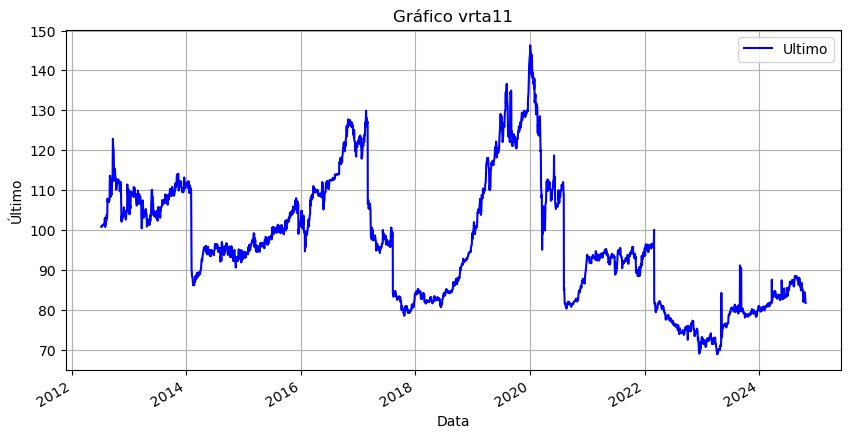

In [42]:
df_vrta['Ultimo'].plot(figsize=(10, 5), color='b', title='Gráfico vrta11') 
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show()  

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_vrta['valor_padronizado'] = scaler.fit_transform(df_vrta[['Ultimo']])

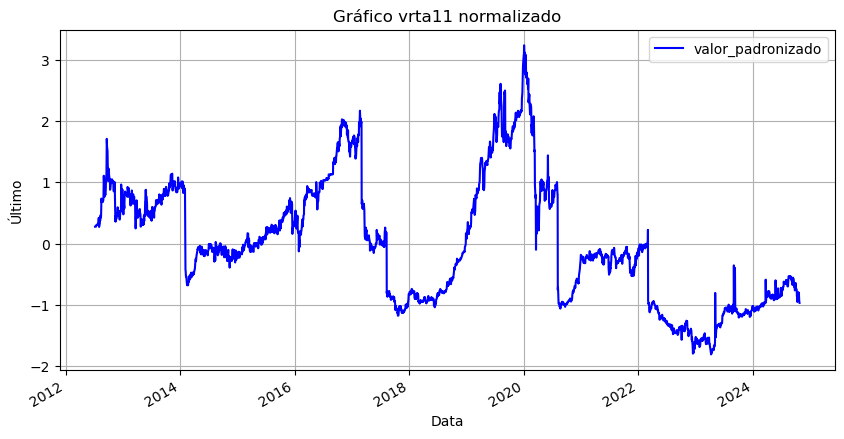

In [44]:
df_vrta['valor_padronizado'].plot(figsize=(10, 5), color='b', title='Gráfico vrta11 normalizado') 
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show()  

In [133]:
df_bbrc['valor_padronizado'] = scaler.fit_transform(df_bbrc[['Ultimo']])
df_bova['valor_padronizado'] = scaler.fit_transform(df_bova[['Ultimo']])
df_hgcr['valor_padronizado'] = scaler.fit_transform(df_hgcr[['Ultimo']])
df_hglg['valor_padronizado'] = scaler.fit_transform(df_hglg[['Ultimo']])
df_jsre['valor_padronizado'] = scaler.fit_transform(df_jsre[['Ultimo']])
df_kncr['valor_padronizado'] = scaler.fit_transform(df_kncr[['Ultimo']])
df_knri['valor_padronizado'] = scaler.fit_transform(df_knri[['Ultimo']])
df_mxrf['valor_padronizado'] = scaler.fit_transform(df_mxrf[['Ultimo']])
df_sptw['valor_padronizado'] = scaler.fit_transform(df_sptw[['Ultimo']])

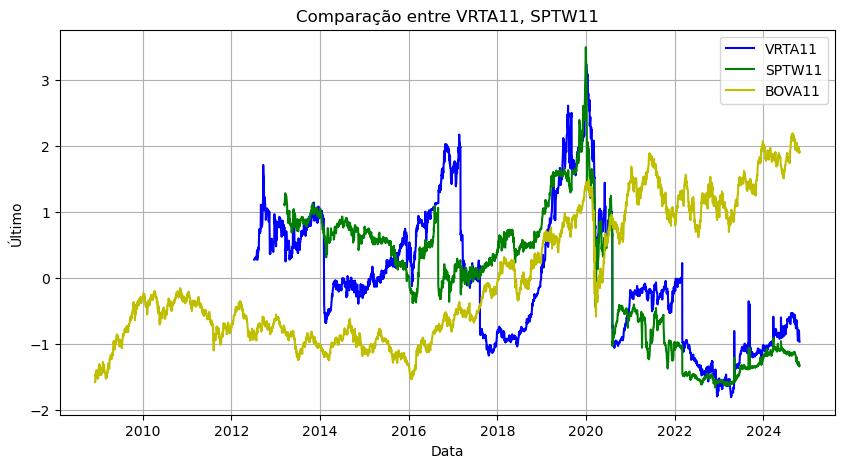

In [137]:
plt.figure(figsize=(10, 5))
plt.plot(df_vrta.index, df_vrta['valor_padronizado'], label='VRTA11', color='b')
plt.plot(df_sptw.index, df_sptw['valor_padronizado'], label='SPTW11', color='g')
plt.plot(df_bova.index, df_bova['valor_padronizado'], label='BOVA11', color='y')
plt.title('Comparação entre VRTA11, SPTW11')
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show() 

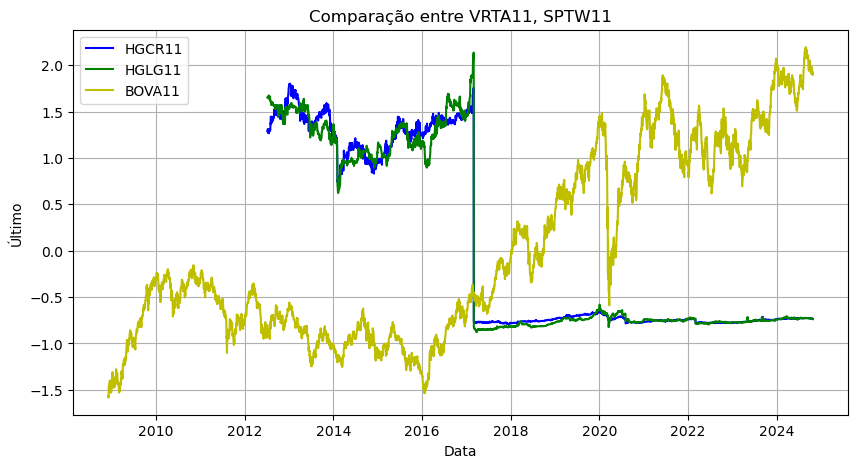

In [139]:
plt.figure(figsize=(10, 5))
plt.plot(df_hgcr.index, df_hgcr['valor_padronizado'], label='HGCR11', color='b')
plt.plot(df_hglg.index, df_hglg['valor_padronizado'], label='HGLG11', color='g')
plt.plot(df_bova.index, df_bova['valor_padronizado'], label='BOVA11', color='y')
plt.title('Comparação entre VRTA11, SPTW11')
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show() 